###  선택된 피쳐로 데이터 불러오기

In [11]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer


data = pd.read_excel("../datasets/최종데이터.xlsx")

data.fillna(0, inplace=True)
column_list=['유동비율', '부채비율',  '매출총이익률', '영업이익률','ROA', 'ROE', 
       '총자산회전율',  '매출액증가율',  '총자산증가율', '시총' 
,'평균근속연수/(기업존속연수+상장년수)', '비정규직비율', '여성고용률', "자산/기말인원","공공조달은1"]

x = data[column_list]
df_17_20 = x[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
df_21 = x[data['회계년도'] == 2021] #validate
y = data['K1_Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
y_21 = y[data['회계년도'] == 2021] #validate
st = StandardScaler()
x= st.fit_transform(x)
x=pd.DataFrame(x)
x.columns=column_list
X_train=df_17_20[column_list]
X_test=df_21[column_list]
y_train=y_17_20
y_test =y_21

# 언더샘플링
X_train_samp, y_train_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_train, y_train)
X_test_samp,y_test_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_test, y_test)

### 머신러닝 모델링 최적 하이퍼 파라미터에 따른 최적 값 

* "dtc" 는 의사결정나무, "rfc"는 랜덤포레스트 분류, "lr"은 로지스틱 회귀입니다.

* 의사결정나무와 랜덤포레스트 분류 모델은 max_depth 와 min_samples_split 정해주기
* 임계점에 따른 정밀도, 재현율, f1-score, auc score 확인

모델명: DecisionTreeClassifier
학습 데이터 최적 파라미터: {'max_depth': 3, 'min_samples_split': 5}
학습 데이터 최고 정확도: 0.797
예측 정확도: 0.788


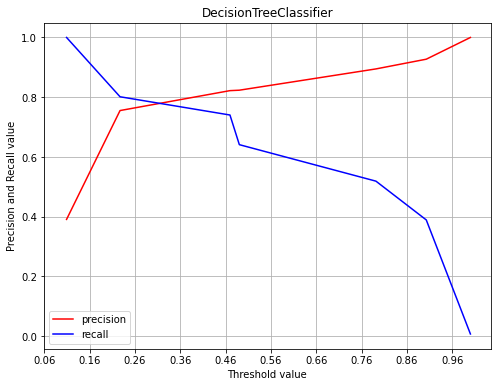

{'max_depth': 3, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=3, min_samples_split=5)
                     models  Accuracy  Precision    Recall  F1 score
0.3  DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
모델명: RandomForestClassifier
학습 데이터 최적 파라미터: {'max_depth': 3, 'min_samples_split': 3}
학습 데이터 최고 정확도: 0.819
예측 정확도: 0.830


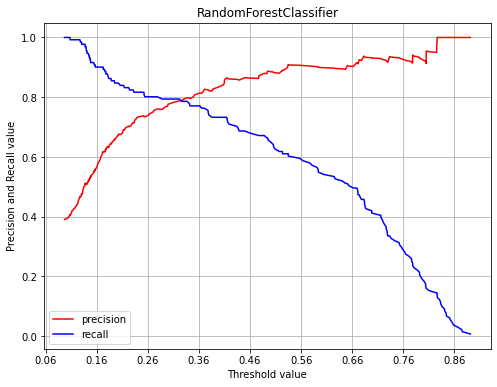

{'max_depth': 3, 'min_samples_split': 3}
RandomForestClassifier(max_depth=3, min_samples_split=3)
                     models  Accuracy  Precision    Recall  F1 score
0.3  DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3  RandomForestClassifier     0.830   0.781955  0.793893  0.787879
모델명: LogisticRegression
학습 데이터 최적 파라미터: {'C': 0.01, 'penalty': 'l2'}
학습 데이터 최고 정확도: 0.643
예측 정확도: 0.609


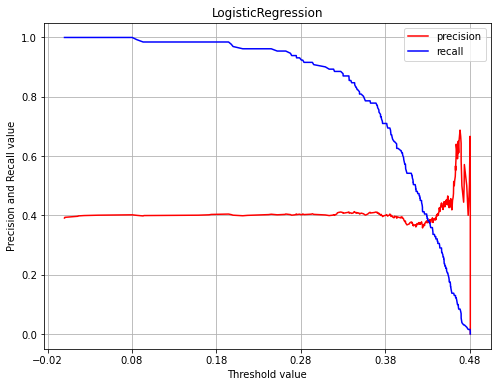

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
                     models  Accuracy  Precision    Recall  F1 score
0.3  DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3  RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1      LogisticRegression     0.609   0.400621  0.984733  0.569536
모델명: svc
학습 데이터 최적 파라미터: {'C': 0.01, 'penalty': 'l2'}
학습 데이터 최고 정확도: 0.643
예측 정확도: 0.609


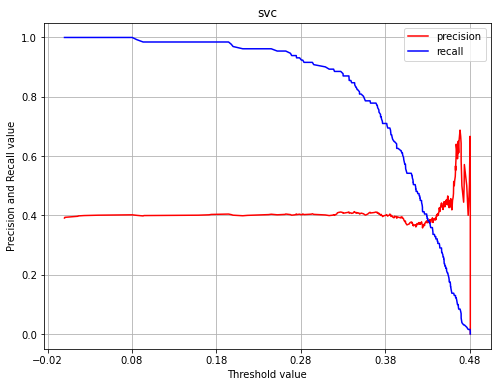

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
                     models  Accuracy  Precision    Recall  F1 score
0.3  DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3  RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1      LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                     svc     0.609   0.400621  0.984733  0.569536
모델명: AdaBoostClassifier
학습 데이터 최적 파라미터: {'n_estimators': 5}
학습 데이터 최고 정확도: 0.812
예측 정확도: 0.818


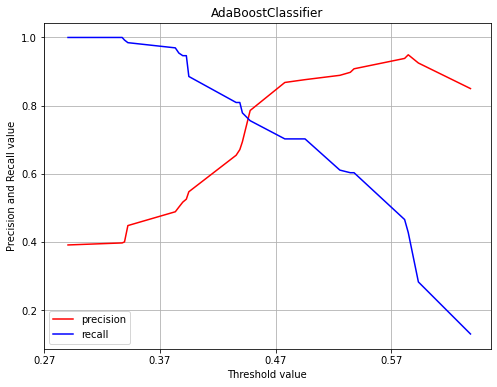

{'n_estimators': 5}
AdaBoostClassifier(n_estimators=5, random_state=0)
                     models  Accuracy  Precision    Recall  F1 score
0.3  DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3  RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1      LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                     svc     0.609   0.400621  0.984733  0.569536
0.5      AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
모델명: GradientBoostingClassifier
학습 데이터 최적 파라미터: {'learning_rate': 0.05, 'n_estimators': 100}
학습 데이터 최고 정확도: 0.806
예측 정확도: 0.833


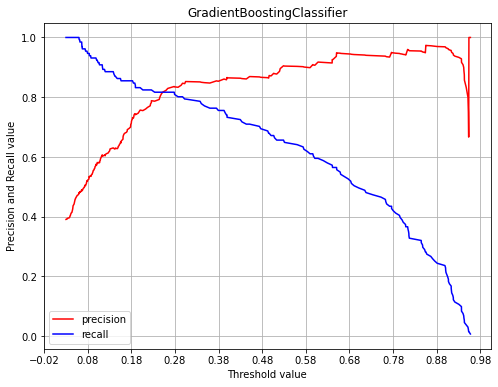

{'learning_rate': 0.05, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.05, random_state=0)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
[18:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an i

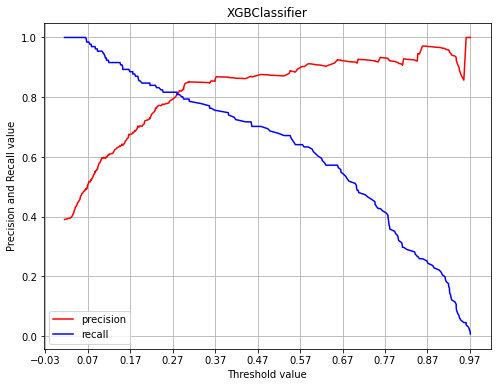

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  

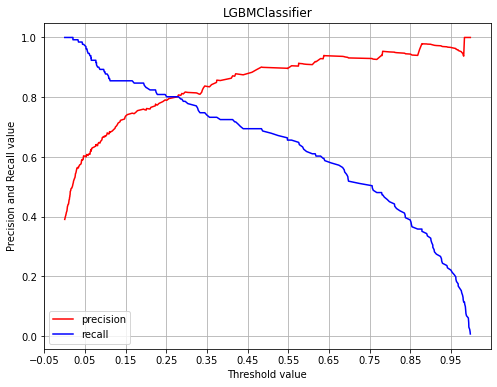

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=400,
               random_state=0)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3               XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3              LGBMClassifier     0.845   0.816000  0.778626  0.796875
모델명: KNeighborsClassifier
학습 데이터 최적 파라미터: {'n_neighbors': 3}
학습 데이터 최고 정확도: 0.459
예측 정확도: 0.600


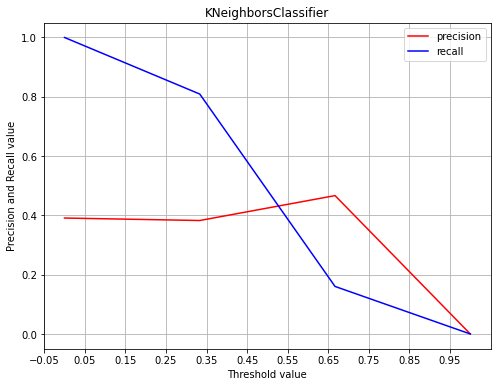

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3               XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3              LGBMClassifier     0.845   0.816000  0.778626  0.796875
0.1        KNeighborsClassifier     0.600   0.382671  0.809160  0.519608
모델명: svr
학습 데이터 최적 파라미터: {'n_neighbors': 3}
학습 데이터 최고 정확도: 0.459
예측 정확도: 0.600


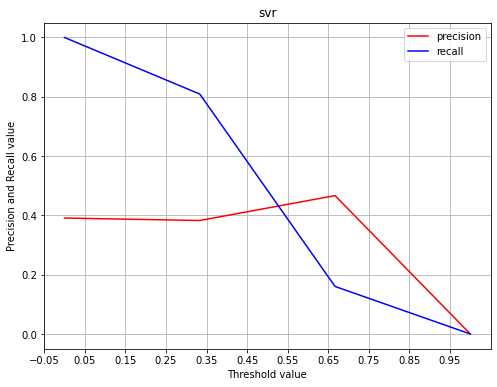

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3               XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3              LGBMClassifier     0.845   0.816000  0.778626  0.796875
0.1        KNeighborsClassifier     0.600   0.382671  0.809160  0.519608
0.1                         svr     0.600   0.382671  0.809160  0.519608
모델명: GaussianProcessClassifier
학습 데이터 최적 파라미터: {'kernel': 1**2 * RBF(length_scale=1)}
학습 데이터 최고 정확도: 0.643
예측 정확도: 0.609


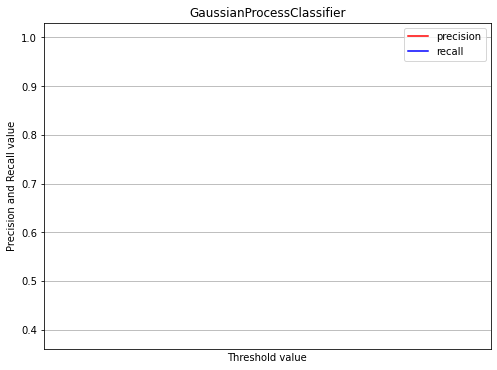

{'kernel': 1**2 * RBF(length_scale=1)}
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3               XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3              LGBMClassifier     0.845   0.816000  0.778626  0.796875
0.1        KNeighborsClassifier     0.600   0.382671  0.809160  0.519608
0.1                         svr     0.600   0.382671  0.809160  0.519608
0.1   GaussianProcessClassifier     0.609   0.391045  1.000000  0.562232
모델명: Gau

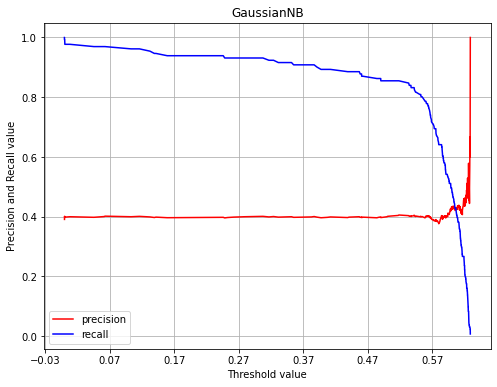

{}
GaussianNB()
                         models  Accuracy  Precision    Recall  F1 score
0.3      DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3      RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1          LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                         svc     0.609   0.400621  0.984733  0.569536
0.5          AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3  GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3               XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3              LGBMClassifier     0.845   0.816000  0.778626  0.796875
0.1        KNeighborsClassifier     0.600   0.382671  0.809160  0.519608
0.1                         svr     0.600   0.382671  0.809160  0.519608
0.1   GaussianProcessClassifier     0.609   0.391045  1.000000  0.562232
0.1                  GaussianNB     0.445   0.400000  0.961832  0.565022
모델명:  QuadraticDiscriminantAnalysis

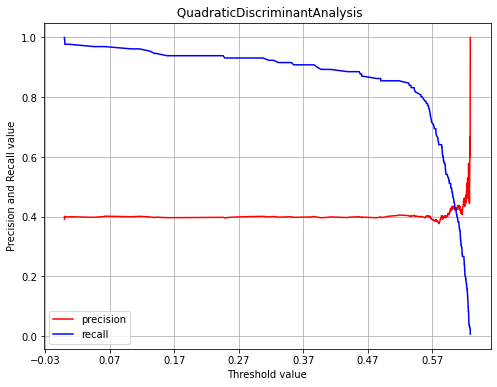

{}
GaussianNB()
                             models  Accuracy  Precision    Recall  F1 score
0.3          DecisionTreeClassifier     0.788   0.822034  0.740458  0.779116
0.3          RandomForestClassifier     0.830   0.781955  0.793893  0.787879
0.1              LogisticRegression     0.609   0.400621  0.984733  0.569536
0.1                             svc     0.609   0.400621  0.984733  0.569536
0.5              AdaBoostClassifier     0.818   0.888889  0.610687  0.723982
0.3      GradientBoostingClassifier     0.833   0.845528  0.793893  0.818898
0.3                   XGBClassifier     0.836   0.852459  0.793893  0.822134
0.3                  LGBMClassifier     0.845   0.816000  0.778626  0.796875
0.1            KNeighborsClassifier     0.600   0.382671  0.809160  0.519608
0.1                             svr     0.600   0.382671  0.809160  0.519608
0.1       GaussianProcessClassifier     0.609   0.391045  1.000000  0.562232
0.1                      GaussianNB     0.445   0.400000  0.

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

df = pd.DataFrame(columns =['models','Accuracy','Precision', 'Recall', 'F1 score'])

list = ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression", "svc","AdaBoostClassifier", "GradientBoostingClassifier", 
        "XGBClassifier", "LGBMClassifier", "KNeighborsClassifier", "svr", "GaussianProcessClassifier", "GaussianNB", " QuadraticDiscriminantAnalysis"]
for i in list:

# def grid(i):
  
  
  if i == "DecisionTreeClassifier":
      dt = DecisionTreeClassifier()
      parameters = [{"max_depth": [3,5,7], "min_samples_split":[3,5,7]}]
  
  elif i == "RandomForestClassifier":
      dt = RandomForestClassifier()
      parameters = [{"max_depth": [3,5,7], "min_samples_split":[3,5,7]}]
      
  elif i == "LogisticRegression":
        dt = LogisticRegression()
        parameters = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}
        
#   elif i == "svc": 
#          dt = SVC(probability=True)
#          values = [0.001, 0.01, 0.1, 1, 10, 100]
#          parameters = [{'kernel':['rbf'], 'C':values, 'gamma':values},

#                {'kernel':['linear'], 'C':values}]

  elif i == "AdaBoostClassifier":
        dt= AdaBoostClassifier(random_state=0)
        parameters={'n_estimators':[5]}
        
  elif i == "GradientBoostingClassifier":
        dt=GradientBoostingClassifier(random_state=0)
        parameters = {
          'n_estimators' : [100, 500],
          'learning_rate' : [0.05, 0.1]
                  }
  elif i == "XGBClassifier":
        dt=XGBClassifier(random_state=0,verbose=1)
        parameters={'n_estimators':[100, 500], 'learning_rate':[0.05, 0.1], 'max_depth':[3,4]}
  
  elif i == "LGBMClassifier":
        dt=LGBMClassifier(random_state=0)
        parameters={'n_estimators':[400,800], 'learning_rate':[0.05, 0.1] , 'max_depth':[3,4]}
  
  elif i == "KNeighborsClassifier":
        dt = KNeighborsClassifier()
        parameters = {'n_neighbors':[3]}

  elif i == 'MLPClassifier':
        dt = MLPClassifier(random_state=0)
        parameters={'max_iter':[1000], 'hidden_layer_sizes':[1], 'activation':['logistic'],
                    'solver':['sgd'], 'alpha':[0.01], 'batch_size':[32],
                    'learning_rate_init':[0.1], 'max_iter':[500]}
  
  elif i == 'GaussianProcessClassifier':
        dt = GaussianProcessClassifier(random_state=0)
        parameters={'kernel': [1.0*RBF(1.0)]}
    
  elif i == 'GaussianNB':
        dt = GaussianNB()
        parameters={}

  elif i =='QuadraticDiscriminantAnalysis':
        dt = QuadraticDiscriminantAnalysis()
        parameters={}
#   elif i == 'svr':
#         dt = SVR(probability=True)
#         parameters={'C':[1.0], 'epsilon':[0.2]}



  grid_dt  = GridSearchCV(dt, param_grid = parameters, cv=5, refit =True, n_jobs=-1)
  grid_dt.fit(X_train_samp, y_train_samp )
  
  print("모델명: %s" %i)
  print(f"학습 데이터 최적 파라미터: {grid_dt.best_params_}")
  print(f"학습 데이터 최고 정확도: {grid_dt.best_score_:.3f}")

  estimator = grid_dt.best_estimator_
  y_pred = pd.DataFrame(estimator.predict(X_test_samp))
#   if i == "svr":
#         y_pred_probability = pd.DataFrame(estimator.predict_proba_lr(X_test_samp))
#   else:
#         y_pred_probability = pd.DataFrame(estimator.predict_proba(X_test_samp))
  y_pred_probability = pd.DataFrame(estimator.predict_proba(X_test_samp))
  print(f"예측 정확도: {accuracy_score(y_test_samp, y_pred):.3f}")

  prediction = pd.concat([y_pred_probability, y_pred], axis = 1)

  prediction.columns = ["Negative(0)", "Positive(1)", "y_pred"]
  pred_proba_1 = np.array(prediction["Positive(1)"]).reshape(-1, 1)
  b= round(accuracy_score(y_test_samp, y_pred),3)






  thresholds = [0.1,0.2,0.3,0.4,0.5,0.55,0.6, 0.65, 0.7, 0.8]
#   thresholds = [0.5]

  def get_f1_score(y_test_samp, pred_proba_1,thresholds):
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in thresholds:

      binarizer = Binarizer(threshold = threshold)
      # 임계점 지정하여 Binariazer() 객체 생성
      pred_proba = binarizer.fit_transform(pred_proba_1)
      # 임계점을 기준으로 데이터 변환

      precision = precision_score(y_test_samp, pred_proba)
      recall = recall_score(y_test_samp, pred_proba)
      f1score = f1_score(y_test_samp, pred_proba)

      precisions.append(precision)
      recalls.append(recall)
      f1_scores.append(f1score)
    results = pd.DataFrame(data = {"models":i,"Accuracy":b,"Precision": precisions,
                                  "Recall": recalls,
                                  "F1 score": f1_scores}, index = thresholds)


    results.sort_values("F1 score", ascending=False, inplace=True)
    new_model_df= results.iloc[:1]
    global df
    df = pd.concat([df,new_model_df])

    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test_samp, pred_proba_1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    # threshold의 구간이 몇 개로 나뉘어져 있는지 확인

    plt.plot(thresholds, precisions[0:threshold_boundary], color = "red", label = "precision")
    # x축이 threshold, y축이 precision인 그래프
    plt.plot(thresholds, recalls[0:threshold_boundary], color = "blue", label = "recall")
  
    start, end = plt.xlim()
    # x축과 y축의 범위를 얻어 각각 start와 end로 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    # x축의 눈금을 start부터 end까지 0.1 간격으로 표시

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.title(i)
    plt.legend()
    plt.grid()
    plt.show()
    print(grid_dt.best_params_)
    print(grid_dt.best_estimator_)
    
    return df
  
  




  print(get_f1_score(y_test_samp, pred_proba_1,thresholds))
  print("="*80)


In [20]:
df1=df.reset_index(drop=False)
df2=df1.set_index("models")
df2.rename(columns={"index":"threshold"}, inplace=True)
df2.style.highlight_max(axis=0,color='red')

,threshold,Accuracy,Precision,Recall,F1 score
models,,,,,
DecisionTreeClassifier,0.300000,0.788000,0.822034,0.740458,0.779116
RandomForestClassifier,0.300000,0.830000,0.781955,0.793893,0.787879
LogisticRegression,0.100000,0.609000,0.400621,0.984733,0.569536
svc,0.100000,0.609000,0.400621,0.984733,0.569536
AdaBoostClassifier,0.500000,0.818000,0.888889,0.610687,0.723982
GradientBoostingClassifier,0.300000,0.833000,0.845528,0.793893,0.818898
XGBClassifier,0.300000,0.836000,0.852459,0.793893,0.822134
LGBMClassifier,0.300000,0.845000,0.816000,0.778626,0.796875
KNeighborsClassifier,0.100000,0.600000,0.382671,0.809160,0.519608
